In [9]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [10]:
from sklearn.datasets import make_blobs

In [11]:
data = make_blobs(n_samples=200,n_features=2,centers=4,random_state=101,cluster_std=1.8)

In [20]:
data[0].shape

(200, 2)

In [13]:
type(data)

tuple

In [18]:
data

(array([[-6.42884095e+00,  1.01411174e+01],
        [ 5.86867888e+00,  5.20110356e+00],
        [-3.76109375e-01,  3.26427943e+00],
        [ 2.16679181e+00,  9.56300522e+00],
        [ 5.09508570e+00,  7.20752718e+00],
        [-1.08788882e+01, -6.11318040e+00],
        [ 2.03405554e+00,  9.76664755e+00],
        [-1.71798771e+00,  1.41401140e+00],
        [ 1.16911341e+00,  8.24556988e+00],
        [-1.35185444e+00,  3.13245345e+00],
        [-6.18548214e+00,  9.67406555e+00],
        [-1.19856602e+00,  2.50408937e+00],
        [ 2.90296863e+00,  7.91251003e+00],
        [ 2.39250023e+00,  5.38173971e+00],
        [-5.27545147e+00,  9.63836659e+00],
        [-5.66814687e-01,  5.60262755e-02],
        [ 5.97336628e+00,  5.87172022e+00],
        [-2.31355268e+00,  5.23980092e-01],
        [-1.01344756e+01, -3.43130837e+00],
        [-4.54082629e+00,  1.13920174e+01],
        [-1.04155833e+01, -5.67545836e+00],
        [ 6.64796693e-01,  9.42304718e-02],
        [ 2.11460477e+00,  3.559

In [22]:
df=pd.DataFrame(data[0],columns=['A','B'])

In [25]:
df['target'] = data[1]

In [26]:
df.head()

,A,B,target
0,-6.428841,10.141117,3
1,5.868679,5.201104,2
2,-0.376109,3.264279,0
3,2.166792,9.563005,2
4,5.095086,7.207527,2


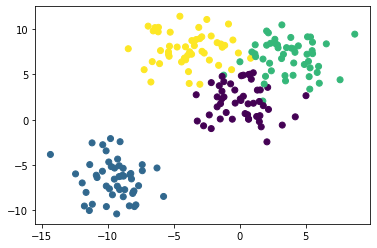

In [29]:
plt.scatter('A','B',data=df,c=df['target'])

In [30]:
from sklearn.cluster import KMeans

In [31]:
kmeans=KMeans(n_clusters=4)

In [32]:
kmeans.fit(df[['A','B']])

KMeans(n_clusters=4)

In [33]:
kmeans.cluster_centers_

array([[-4.13591321,  7.95389851],
       [-9.46941837, -6.56081545],
       [-0.0123077 ,  2.13407664],
       [ 3.71749226,  7.01388735]])

In [36]:
kmeans.labels_

array([0, 3, 2, 3, 3, 1, 3, 2, 3, 2, 0, 2, 3, 3, 0, 2, 3, 2, 1, 0, 1, 2,
       2, 1, 0, 1, 1, 2, 3, 3, 0, 1, 3, 2, 2, 0, 1, 1, 1, 2, 1, 0, 0, 0,
       2, 3, 0, 2, 1, 2, 2, 0, 3, 2, 1, 0, 2, 2, 0, 3, 1, 3, 1, 0, 3, 2,
       1, 3, 3, 1, 3, 2, 1, 2, 1, 3, 3, 2, 0, 2, 2, 1, 3, 1, 2, 2, 2, 0,
       2, 1, 1, 1, 1, 2, 2, 1, 3, 0, 1, 3, 2, 1, 2, 2, 3, 2, 1, 3, 1, 1,
       3, 0, 0, 3, 1, 3, 0, 0, 3, 0, 2, 0, 2, 0, 2, 3, 0, 2, 1, 0, 0, 0,
       2, 1, 1, 0, 3, 0, 3, 2, 1, 3, 1, 0, 0, 3, 2, 1, 0, 0, 0, 0, 2, 3,
       2, 0, 3, 3, 3, 2, 3, 2, 2, 0, 1, 0, 2, 3, 0, 2, 3, 2, 0, 3, 2, 0,
       3, 3, 1, 3, 0, 1, 1, 0, 1, 1, 1, 1, 1, 2, 1, 3, 3, 0, 1, 2, 3, 3,
       1, 2])

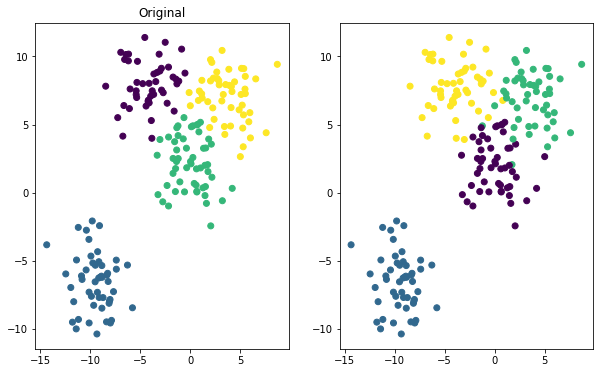

In [39]:
fig, (ax1,ax2)=plt.subplots(1,2,figsize=(10,6))

ax1.set_title('KMeans')
ax1.scatter('A','B',data=df,c=kmeans.labels_)




ax1.set_title('Original')
ax2.scatter('A','B',data=df,c=df['target'])

In [40]:
sse=[]
for k in range(1,10):
    km=KMeans(n_clusters=k)
    km.fit(df[['A','B']])
    sse.append(km.inertia_)
    

In [41]:
sse

[12633.99368326844,
 3799.162909941341,
 2288.325735751494,
 1318.4035725547487,
 1133.9123181769849,
 993.5938054791778,
 870.2370953805207,
 764.0699758653707,
 659.3662280061689]

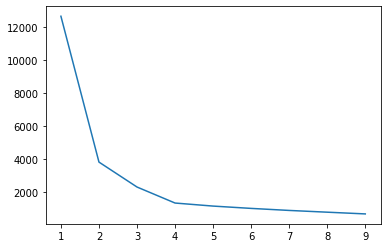

In [42]:
plt.plot(range(1,10),sse)

### Standardization

In [43]:
df

,A,B,target
0,-6.428841,10.141117,3
1,5.868679,5.201104,2
2,-0.376109,3.264279,0
3,2.166792,9.563005,2
4,5.095086,7.207527,2
...,...,...,...
195,0.671402,4.975115,0
196,6.560002,8.351321,2
197,5.134971,9.125419,2
198,-9.261985,-4.336104,1


In [55]:
from sklearn.preprocessing  import StandardScaler
scaler=StandardScaler()
scaler.fit(df.drop('target',axis=1))
#print(scaler)
scaled_features = scaler.transform(df.drop("target" , axis=1))
           

StandardScaler()


In [45]:
scaled_features

array([[-7.74096520e-01,  1.27068730e+00],
       [ 1.58438109e+00,  4.47149481e-01],
       [ 3.86725509e-01,  1.24266191e-01],
       [ 8.74415352e-01,  1.17431161e+00],
       [ 1.43601767e+00,  7.81635534e-01],
       [-1.62754802e+00, -1.43902757e+00],
       [ 8.48958550e-01,  1.20826033e+00],
       [ 1.29373614e-01, -1.84187539e-01],
       [ 6.83075780e-01,  9.54685135e-01],
       [ 1.99592419e-01,  1.02289800e-01],
       [-7.27423994e-01,  1.19282621e+00],
       [ 2.28990811e-01, -2.46326446e-03],
       [ 1.01560289e+00,  8.99161528e-01],
       [ 9.17702800e-01,  4.77262898e-01],
       [-5.52893927e-01,  1.18687492e+00],
       [ 3.50151125e-01, -4.10573971e-01],
       [ 1.60445855e+00,  5.58946370e-01],
       [ 1.51532948e-02, -3.32562516e-01],
       [-1.48478099e+00, -9.91939137e-01],
       [-4.12003971e-01,  1.47922183e+00],
       [-1.53869317e+00, -1.36605598e+00],
       [ 5.86355490e-01, -4.04205041e-01],
       [ 8.64406670e-01,  1.73462512e-01],
       [-1.

In [47]:
df_feat=pd.DataFrame(scaled_features,columns=['A','B'])

In [49]:
df_feat

,A,B
0,-0.774097,1.270687
1,1.584381,0.447149
2,0.386726,0.124266
3,0.874415,1.174312
4,1.436018,0.781636
...,...,...
195,0.587622,0.409475
196,1.716966,0.972315
197,1.443667,1.101363
198,-1.317451,-1.142775


In [52]:
sse=[]
for k in range(1,10):
    km=KMeans(n_clusters=k)
    km.fit(df_feat[['A','B']])
    sse.append(km.inertia_)

In [53]:
sse

[400.0,
 124.4517816397889,
 71.8783589639794,
 42.18786354558243,
 35.87596339974777,
 31.61318412337719,
 27.57187301060826,
 24.245244808652036,
 21.223857690929744]

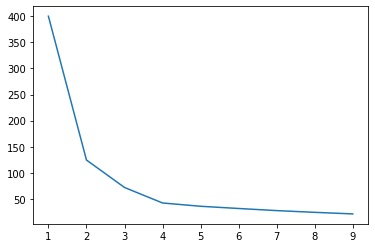

In [54]:
plt.plot(range(1,10),sse)